<a href="https://colab.research.google.com/github/Athena2262/Visual-analytics-mini-project/blob/main/cancerprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/content/cancer.csv")

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:

data["diagnosis"] = data["diagnosis"].replace("M",1)

In [9]:
data["diagnosis"] = data["diagnosis"].replace("B",0)

In [10]:
data.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


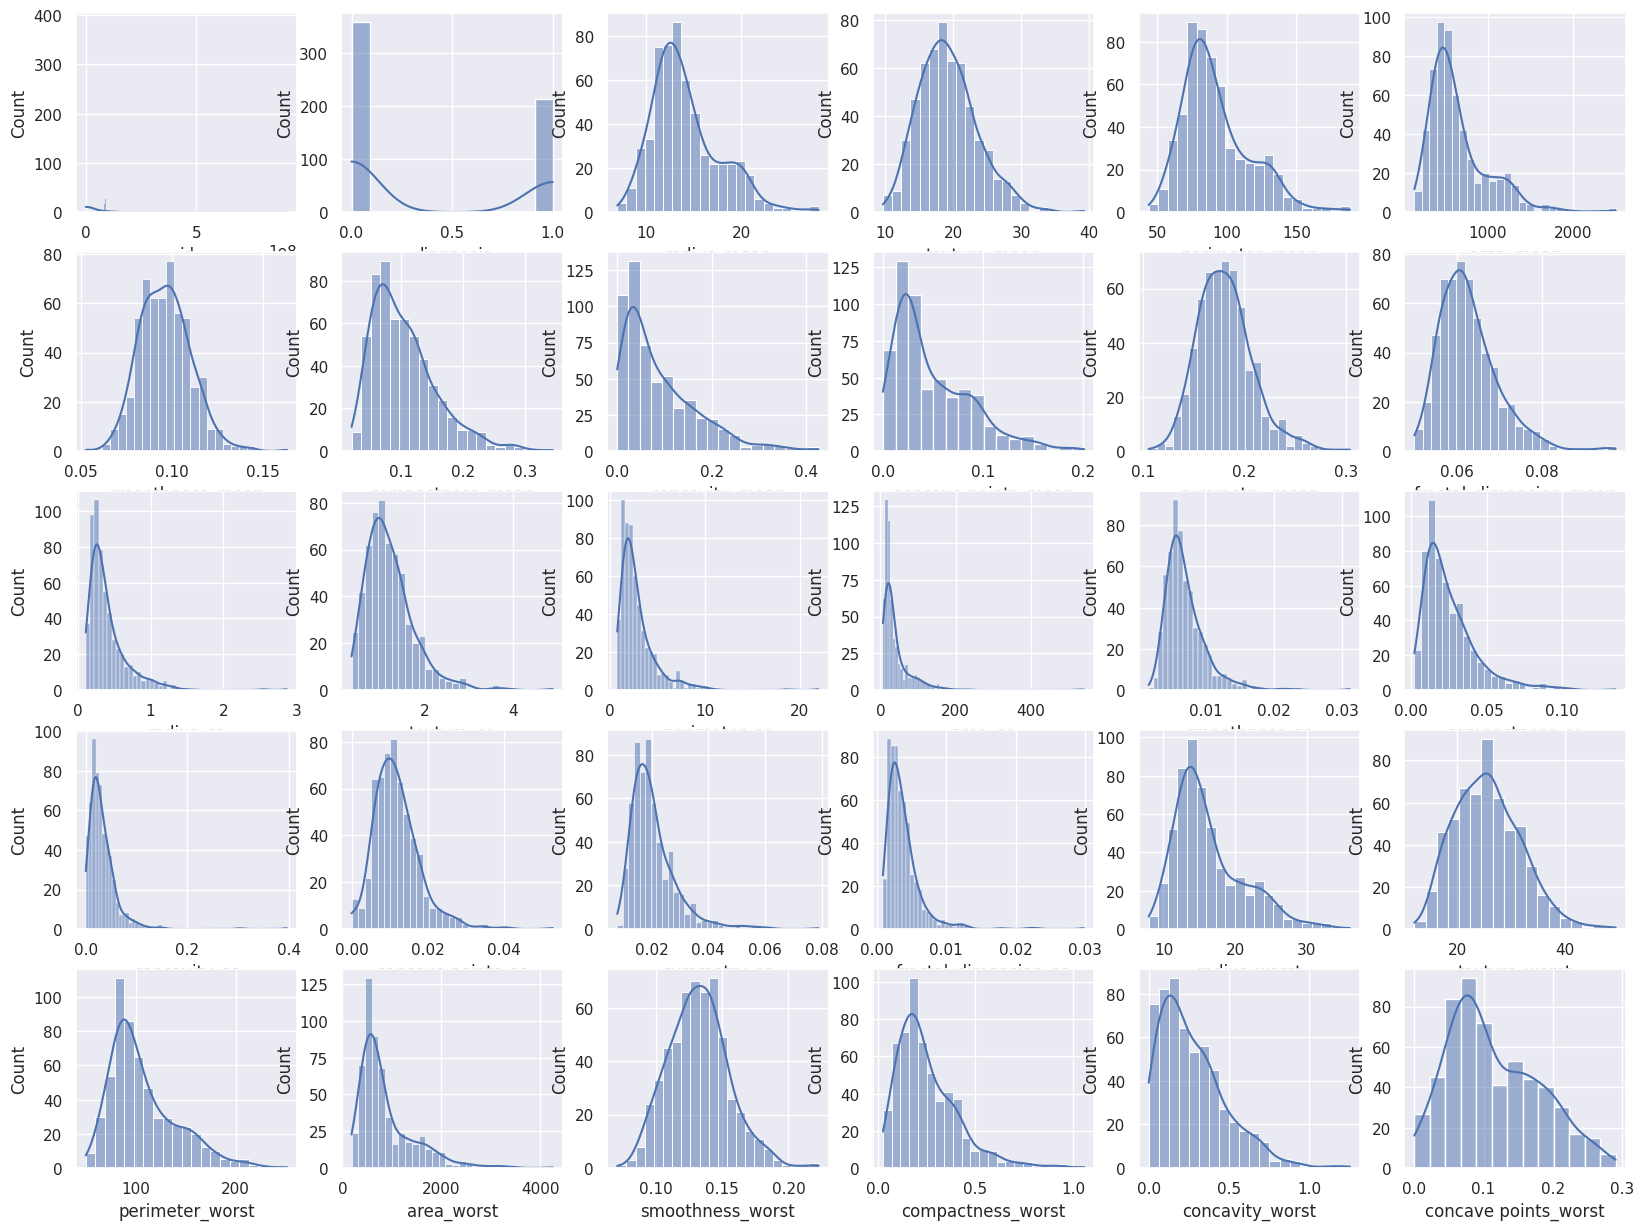

In [ ]:
plt.figure(figsize = (20, 15))
sns.set(style="darkgrid")
plotnumber = 1

for column in data:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(data[column],kde=True)
        plt.xlabel(column)

    plotnumber += 1
plt.show()


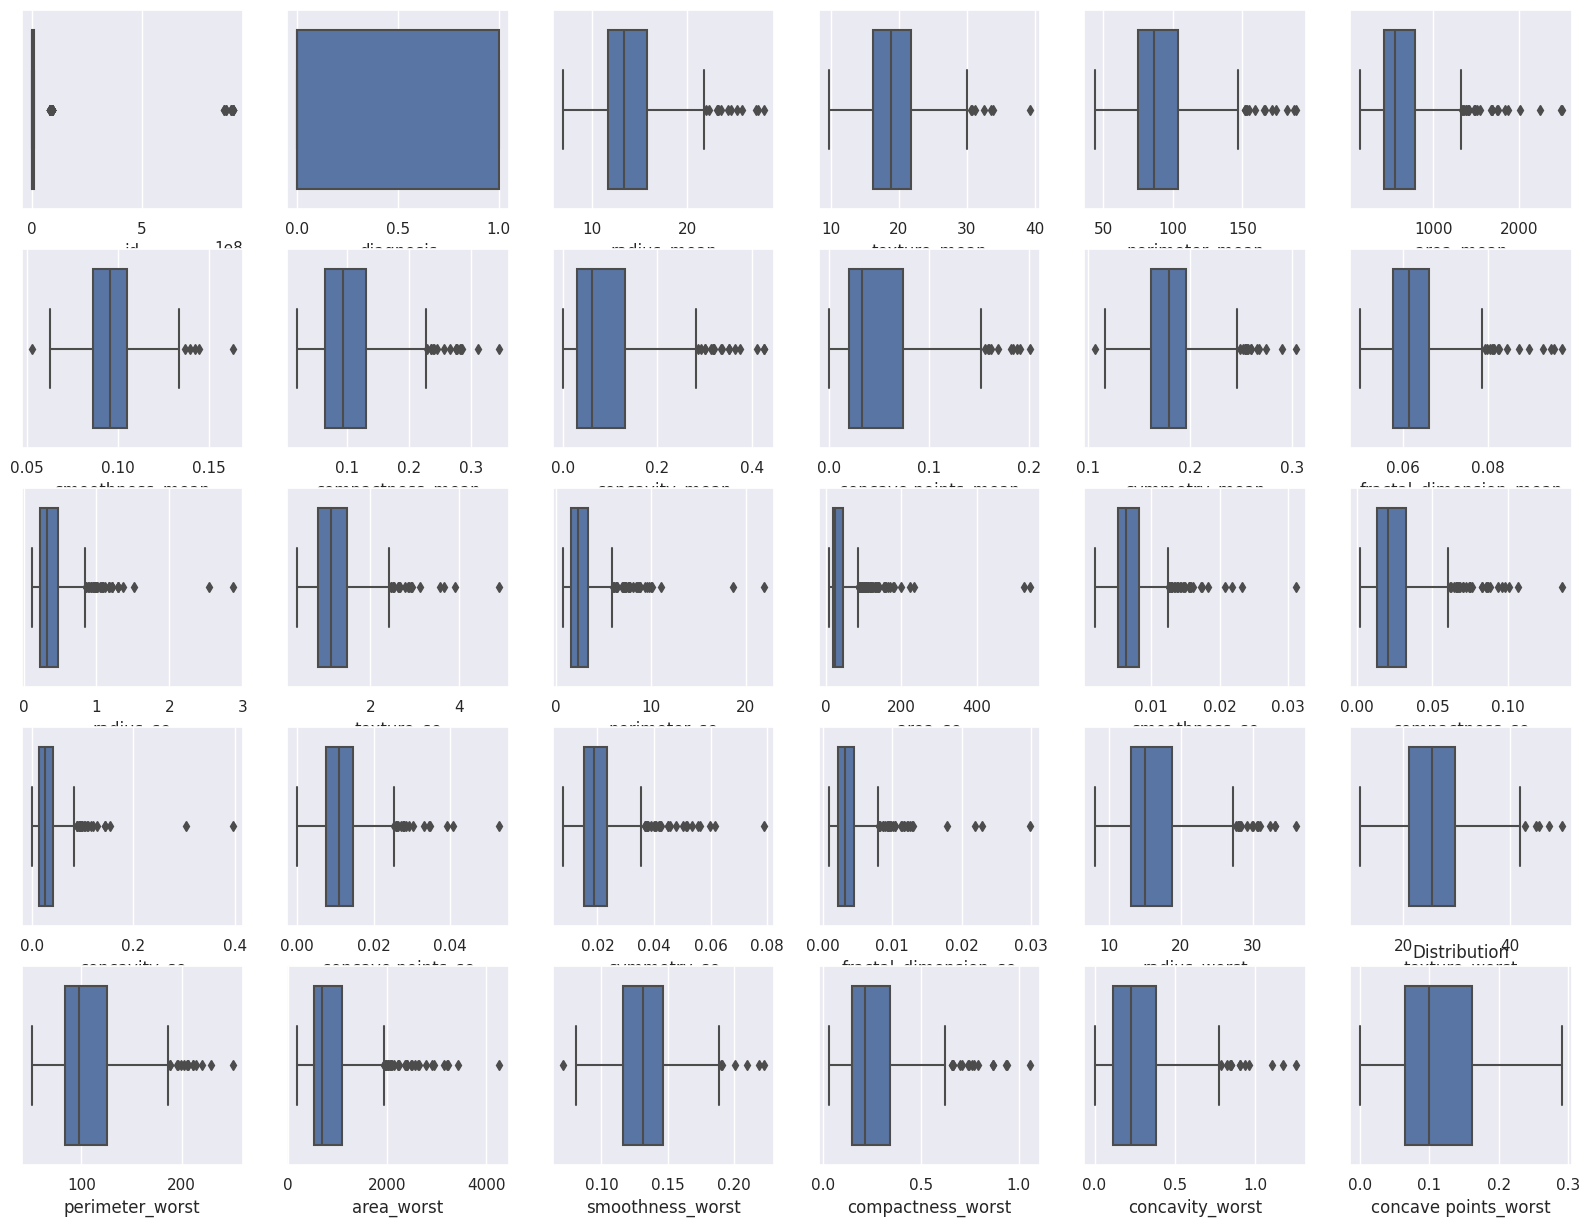

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in data:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column)

    plotnumber += 1
plt.title("Distribution")
plt.show()


<Axes: >

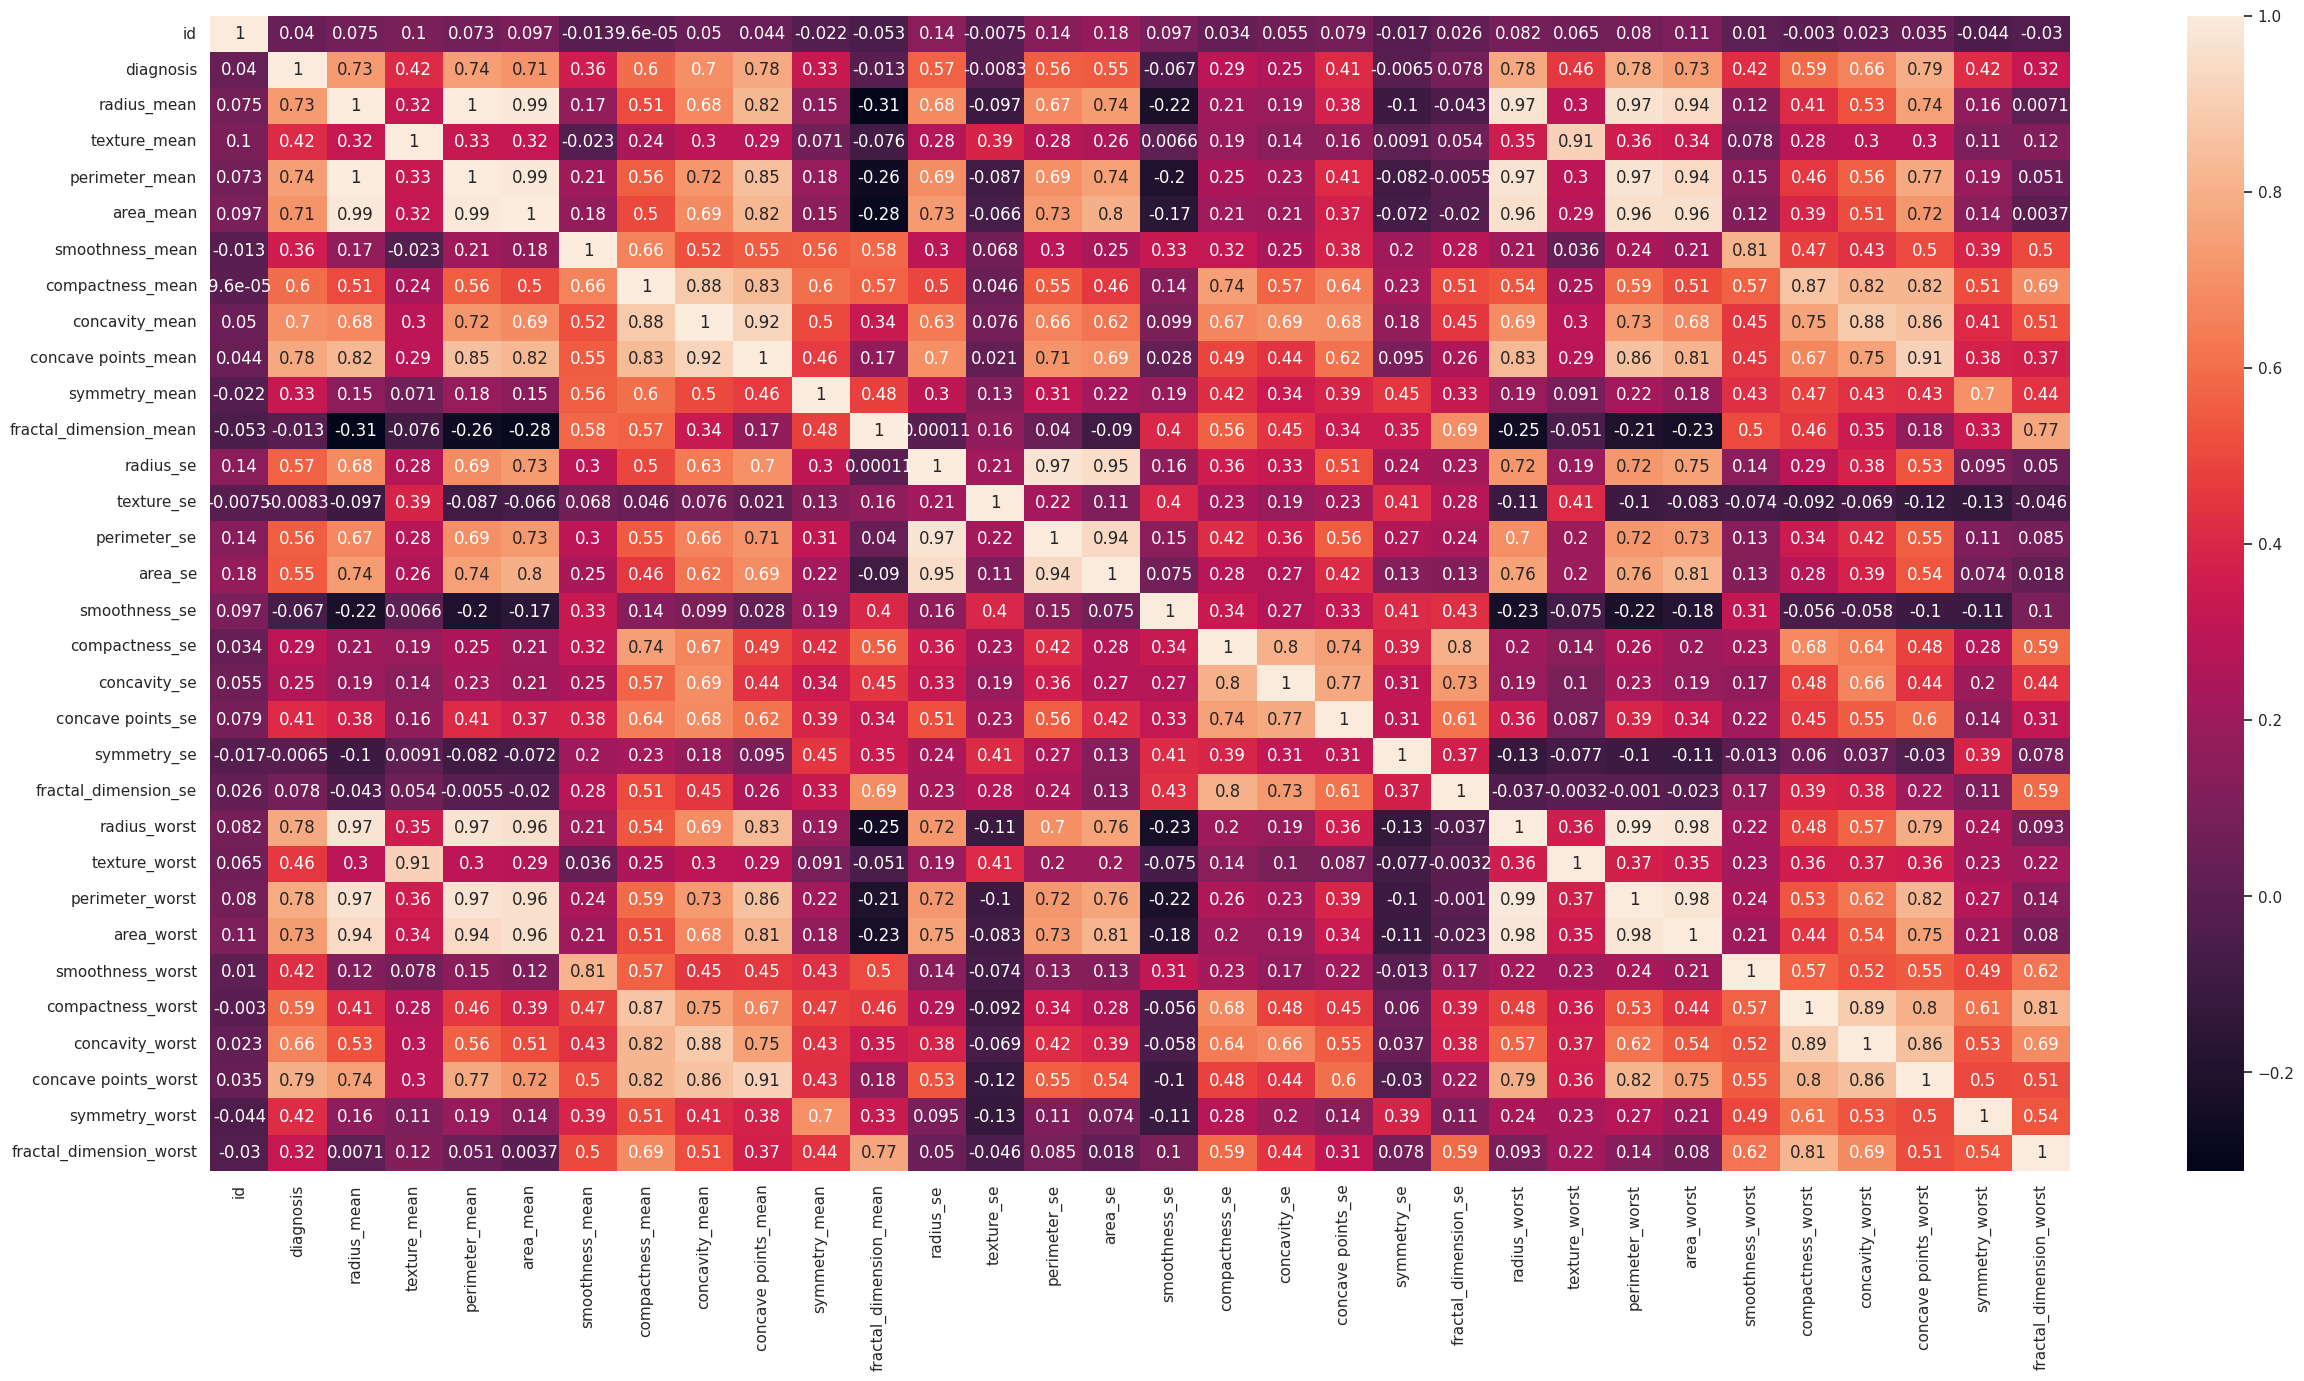

In [ ]:
plt.figure(figsize = (30, 15))
sns.heatmap(data.corr(),annot=True)

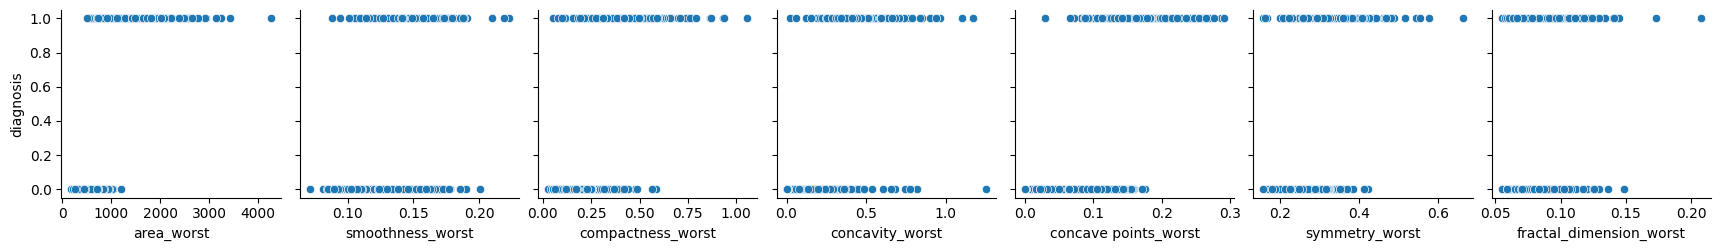

In [12]:
sns.pairplot(data,x_vars=['area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',  'concave points_worst', 'symmetry_worst','fractal_dimension_worst'],
             y_vars=["diagnosis"])



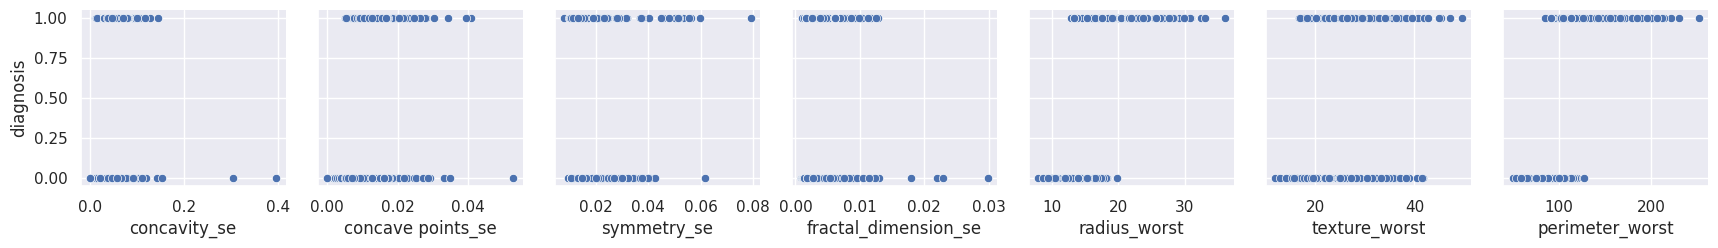

In [ ]:
sns.pairplot(data,
             x_vars=[  'concavity_se',
                     'concave points_se',
                     'symmetry_se',
                     'fractal_dimension_se',
                     'radius_worst',
                     'texture_worst',
                  'perimeter_worst'],
             y_vars=["diagnosis"])

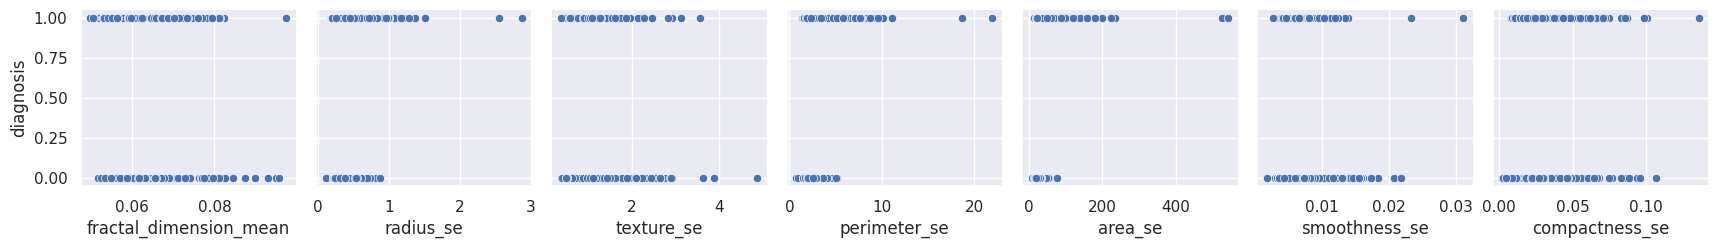

In [ ]:
sns.pairplot(data,
             x_vars=[
                     'fractal_dimension_mean',
                       'radius_se',
                     'texture_se',
                     'perimeter_se',
                     'area_se',
                     'smoothness_se',
                    'compactness_se'],
                y_vars=["diagnosis"])

In [15]:
c={"Agg_of_all":(data["radius_mean"]+data["texture_mean"]+data["perimeter_mean"]+data["area_mean"]+data["smoothness_mean"]+data["compactness_mean"]+
                data["concavity_mean"]+data["concave points_mean"]+data["symmetry_mean"]+data["fractal_dimension_mean"]+data["radius_se"]+data["texture_se"]+
                data["perimeter_se"]+data["area_se"]+data["smoothness_se"]+data["compactness_se"]+data["concavity_se"]+data["concave points_se"]+
                data["fractal_dimension_se"]+data["symmetry_se"]+data["radius_worst"]+data["texture_worst"]+data["perimeter_worst"]+data["area_worst"]+
                data["smoothness_worst"]+data["compactness_worst"]+data["concavity_worst"]+data["concave points_worst"]+data["symmetry_worst"]+data["fractal_dimension_worst"]),"diagnosis":data["diagnosis"]}
data_1 = pd.DataFrame(data=c)

In [16]:
data_1.head()

,Agg_of_all,diagnosis
0,3566.178472,1
1,3740.923467,1
2,3387.392551,1
3,1240.001848,1
4,3336.684215,1


In [17]:
data_1["Agg_of_all"]=(data_1["Agg_of_all"]-data_1["Agg_of_all"].min())/(data_1["Agg_of_all"].max()-data_1["Agg_of_all"].min())

In [18]:
data_1.head()

,Agg_of_all,diagnosis
0,0.416536,1
1,0.440160,1
2,0.392366,1
3,0.102058,1
4,0.385510,1


<Axes: xlabel='Agg_of_all', ylabel='diagnosis'>

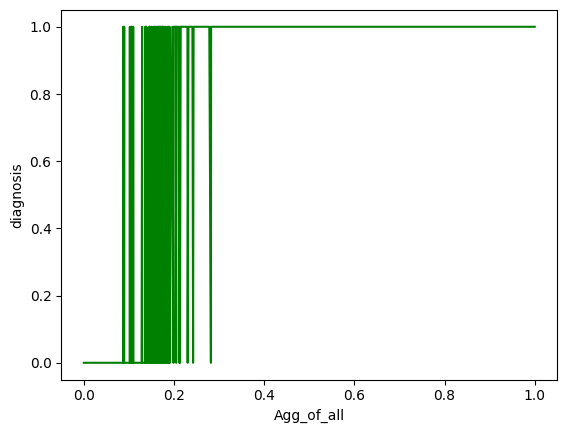

In [25]:
lineplot_color = "green"
sns.lineplot(data=data_1, x="Agg_of_all", y="diagnosis", color=lineplot_color)

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
def claculate_vif(dataset):
    vif=pd.DataFrame()
    vif_features = dataset.columns
    vif["vif_values"] = [variance_inflation_factor(dataset.values,i) for i in range (dataset.shape[1])]
    return vif


In [28]:
features = data[['radius_mean', 'texture_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
claculate_vif(features)

,vif_values
0,7556.009843
1,250.766688
2,1281.013160
3,387.169455
4,115.036662
5,147.434285
6,154.239026
7,184.296547
8,606.487835
9,229.343950


In [29]:
X=data[['radius_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
Y=data["diagnosis"]

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=500)

In [31]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression()

In [33]:
y_pred = classifier.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(Y_test, classifier.predict(X_test)))

0.9941520467836257


In [35]:
print(confusion_matrix(Y_test, y_pred))

[[114   1]
 [  0  56]]


In [36]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       115
           1       0.98      1.00      0.99        56

    accuracy                           0.99       171
   macro avg       0.99      1.00      0.99       171
weighted avg       0.99      0.99      0.99       171



In [37]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors =5, metric="minkowski",p=2)
classifier.fit(X_train,Y_train)

KNeighborsClassifier()

In [38]:
y_pred = classifier.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(Y_test, y_pred)
report = classification_report(Y_test, y_pred)
cm = confusion_matrix(Y_test, y_pred)


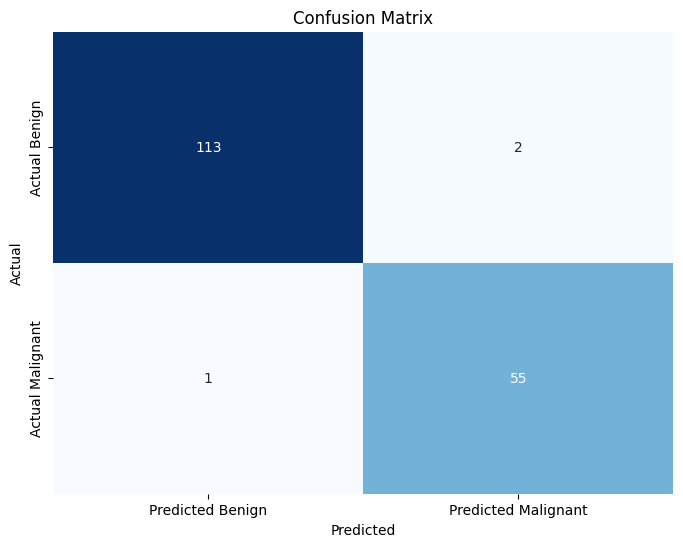

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(Y_test, y_pred)  # Replace Y_test and Y_pred with your actual test labels and predictions

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Benign", "Predicted Malignant"],
            yticklabels=["Actual Benign", "Actual Malignant"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()


In [42]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_test,y_pred)
print(cm)

[[113   2]
 [  1  55]]


In [43]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       115
           1       0.96      0.98      0.97        56

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [47]:
#SVM
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,Y_train)

SVC()

In [48]:
y_pred_svc = svc_model.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(Y_test, y_pred_svc))

0.9824561403508771


In [50]:
print(confusion_matrix(Y_test, y_pred_svc))

[[112   3]
 [  0  56]]


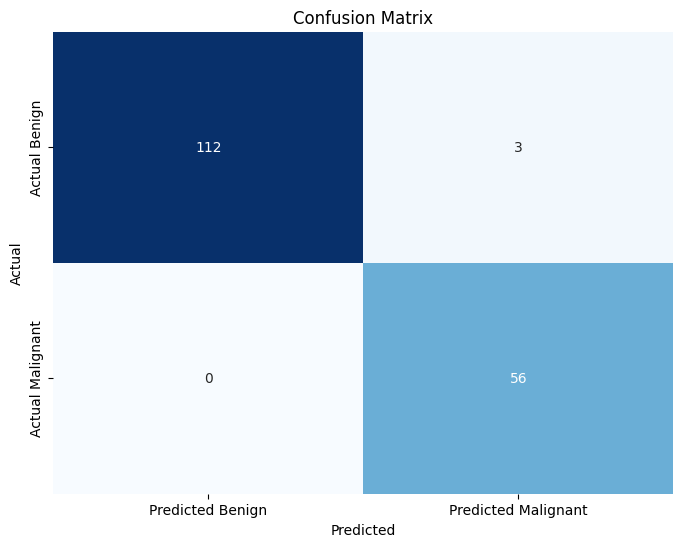

In [52]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(Y_test, y_pred_svc)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Benign", "Predicted Malignant"],
            yticklabels=["Actual Benign", "Actual Malignant"])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()


In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       115
           1       0.96      0.98      0.97        56

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [53]:
param_grid={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf']}

In [54]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(X_train,Y_train)
grid.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.613 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.613 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.925 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.925 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.962 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.861 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.912 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [55]:
grid_predict = grid.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(Y_test, grid_predict))

0.9941520467836257


In [57]:
print(confusion_matrix(Y_test,grid_predict ))

[[114   1]
 [  0  56]]


In [58]:
print(classification_report(Y_test, grid_predict))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       115
           1       0.98      1.00      0.99        56

    accuracy                           0.99       171
   macro avg       0.99      1.00      0.99       171
weighted avg       0.99      0.99      0.99       171



Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.938 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.975 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.975 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.987 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.924 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.925 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.925 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.962 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.861 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.912 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly

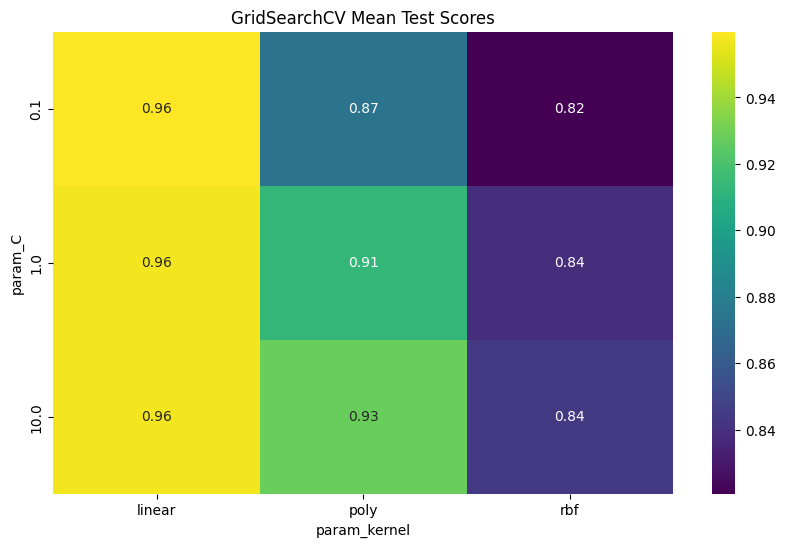

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': [0.1, 1, 'scale']}

# Create a GridSearchCV object
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=4)
grid.fit(X_train, Y_train)

# Access the results as a DataFrame
results = pd.DataFrame(grid.cv_results_)

# Plot the mean test scores for different hyperparameter combinations
plt.figure(figsize=(10, 6))
heatmap_data = results.pivot_table(index='param_C', columns='param_kernel', values='mean_test_score')
sns.heatmap(heatmap_data, annot=True, cmap='viridis')
plt.title('GridSearchCV Mean Test Scores')
plt.show()


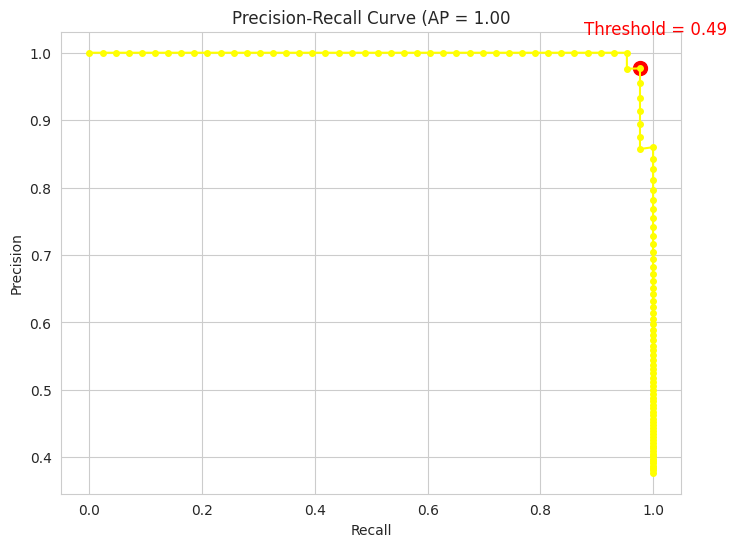

In [67]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Load the dataset (replace with your data loading code)
data = pd.read_csv("/content/cancer.csv")

# Separate features (X) and labels (y)
X = data.drop(columns=["id", "diagnosis"])
y = data["diagnosis"]

# Encode the diagnosis labels to numerical values (Malignant: 1, Benign: 0)
y = (y == 'M').astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a classifier (Logistic Regression in this example)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict probabilities on the test set
y_scores = classifier.predict_proba(X_test)[:, 1]

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Calculate the area under the precision-recall curve (average precision)
average_precision = average_precision_score(y_test, y_scores)

# Find the index of the threshold that maximizes F1 score
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold_index = np.argmax(f1_scores)

# Plot the precision-recall curve
# Plot the precision-recall curve with a different line color
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='o', linestyle='-', markersize=4, color='yellow')  # Change 'royalblue' to your desired color
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AP = {average_precision:.2f}')

# Highlight the optimal point on the curve
plt.scatter(recall[optimal_threshold_index], precision[optimal_threshold_index], color='red', s=100)
plt.annotate(f'Threshold = {thresholds[optimal_threshold_index]:.2f}',
             (recall[optimal_threshold_index] - 0.1, precision[optimal_threshold_index] + 0.05),
             fontsize=12, color='red')

plt.grid(True)
plt.show()


In [ ]:
pip install torch

In [ ]:
pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the dataset (replace with your data loading code)
data = pd.read_csv("/content/cancer.csv")

# Separate features (X) and labels (y)
X = data.drop(columns=["id", "diagnosis"])
y = data["diagnosis"]

# Encode the diagnosis labels to numerical values (Malignant: 1, Benign: 0)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a deep learning model
input_layer = Input(shape=(X_train.shape[1],))
hidden_layer = Dense(64, activation='relu')(input_layer)
output_layer = Dense(1, activation='sigmoid')(hidden_layer)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")

Epoch 1/100
15/15 [==============================] - 1s 21ms/step - loss: 0.6580 - accuracy: 0.6264 - val_loss: 0.4412 - val_accuracy: 0.8333
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.3478 - accuracy: 0.8967 - val_loss: 0.2619 - val_accuracy: 0.9474
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.2322 - accuracy: 0.9385 - val_loss: 0.1901 - val_accuracy: 0.9561
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1812 - accuracy: 0.9560 - val_loss: 0.1522 - val_accuracy: 0.9649
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1538 - accuracy: 0.9736 - val_loss: 0.1296 - val_accuracy: 0.9649
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1354 - accuracy: 0.9736 - val_loss: 0.1148 - val_accuracy: 0.9737
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1225 - accuracy: 0.9780 - val_loss: 0.1048 - val_accuracy: 0.9825
Epoch 8/100


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Load the dataset (replace with your data loading code)
data = pd.read_csv("/content/cancer.csv")

# Separate features (X) and labels (y)
X = data.drop(columns=["id", "diagnosis"])

# Split the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple autoencoder model
input_layer = Input(shape=(X_train.shape[1],))
encoded = Dense(32, activation='relu')(input_layer)
decoded = Dense(X_train.shape[1], activation='linear')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on self-supervised task
autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, validation_data=(X_test, X_test))

# Extract learned representations (encoded features)
encoded_features = autoencoder.predict(X_train)

# Now you can use these encoded features for other tasks, including supervised learning tasks.

# Example: Train a classifier using the encoded features
# Example: Train a classifier using the encoded features
encoded_feature_dim = encoded_features.shape[1]  # Get the dimension of the encoded features
classifier = keras.Sequential([
    keras.layers.Input(shape=(encoded_feature_dim,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile and train the classifier
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(encoded_features, y_train, epochs=50, batch_size=32)


Epoch 1/100
15/15 [==============================] - 1s 18ms/step - loss: 1.2928 - val_loss: 1.0408
Epoch 2/100
15/15 [==============================] - 0s 7ms/step - loss: 1.0242 - val_loss: 0.8557
Epoch 3/100
15/15 [==============================] - 0s 8ms/step - loss: 0.8544 - val_loss: 0.7167
Epoch 4/100
15/15 [==============================] - 0s 7ms/step - loss: 0.7210 - val_loss: 0.6015
Epoch 5/100
15/15 [==============================] - 0s 7ms/step - loss: 0.6077 - val_loss: 0.5046
Epoch 6/100
15/15 [==============================] - 0s 7ms/step - loss: 0.5136 - val_loss: 0.4262
Epoch 7/100
15/15 [==============================] - 0s 7ms/step - loss: 0.4388 - val_loss: 0.3653
Epoch 8/100
15/15 [==============================] - 0s 7ms/step - loss: 0.3810 - val_loss: 0.3213
Epoch 9/100
15/15 [==============================] - 0s 7ms/step - loss: 0.3380 - val_loss: 0.2897
Epoch 10/100
15/15 [==============================] - 0s 6ms/step - loss: 0.3058 - val_loss: 0.2651
Epoch 11